# Python Project 1
### Kejin Qian ( kqd3834 ) & Naomi Kaduwela (nak133)

In [1]:
#Import Necessary Packages
import os
import pandas as pd
import matplotlib.pyplot as plt

## Exercise 1 – BABY NAMES BY STATE and YEAR

### Class Implementation

In [2]:
class BabyNames():
    def __init__(self, directory):
        """
        Initialize an BabyNames object by passing in the file location and construct a Pandas DataFrame.
        
        Args:
        directory (string): The directory of user's namesbystate file.
        
        Returns:
        Nonetype
        """
        self.directory = directory
        #initialize an empty list to store data read from files
        frame = []
        for file in os.listdir(self.directory):
            if file[-4:] == '.TXT':
                #retrieve data of each state as a dataframe and append it to the list
                stateData = pd.read_csv(self.directory+'/'+file,index_col=None, header=None, error_bad_lines=False,
                                        names = ['State', 'Gender', 'YOB', 'Name', 'Number'],
                                        encoding='latin-1', lineterminator = '\n')
                frame.append(stateData)
        #combine the dataframes of all states into one
        self.df = pd.concat(frame)
        
    
    def Count(self, state='', year=''):
        """
        Returns the total number of births in a given year and given state.
        
        Args:
        state (string): A state of USA specified by user or leave it as blank ''.
        year (integer): A year between 1910 and 2017 selected by user or leave it as blank ''.
        
        Returns:
        integer: total count of birth under given year and state
        """
        if state and year:
            return sum(self.df[(self.df['State'] == state)&(self.df['YOB'] == year)]['Number'])
        elif state and year == '':
            #if year is empty, count all the births in the specified state for all years
            return sum(self.df[self.df['State'] == state]['Number'])
        elif year and state == '':
            #if state is empty, count all the births in the given year from all states
            return sum(self.df[self.df['YOB'] == year]['Number'])
        else:
            #if both state and year are empty, count all the births in all 50 states from 1910 to 2017 
            return sum(self.df['Number'])
    
    
    def Top10BabyNames(self, state='', year=''):
        """
        Return a Pandas DataFrame of top 10 mostly used names in a given state and given year.
        
        Args:
        state (string): A state of USA specified by user or leave it as blank ''.
        year (integer): A year between 1910 and 2017 selected by user or leave it as blank ''.
        
        Returns:
        Pandas.DataFrame
        """
        #filter and select data based on specified year and state
        if state and year:
            subdf = self.df[(self.df['State'] == state)&(self.df['YOB'] == year)]
        elif state and year == '':
            subdf = self.df[self.df['State'] == state]
        elif year and state == '':
            subdf = self.df[self.df['YOB'] == year]
        else:
            subdf = self.df
        #Group the data selected by Name and Gender, then sum up the number of births for each group
        grouped = subdf.groupby(['Name', 'Gender'])['Number'].agg(sum).reset_index()  
        #separate the grouped data into male dataframe and female dataframe
        grouped_male = grouped[grouped['Gender'] == 'M']
        grouped_female = grouped[grouped['Gender'] == 'F']
        #sort male and female dataframes by number of birth in descending order and select the top 10 names
        top10_male = grouped_male.sort_values(by = 'Number', ascending = False).iloc[:10,:]['Name']
        top10_female = grouped_female.sort_values(by = 'Number', ascending = False).iloc[:10,:]['Name']
        #make a new dataframe called dfoutput to present the rank and top 10 names
        rank = [i for i in range(1,11)]
        dfoutput = pd.DataFrame(columns=['Rank','Male','Female'])
        dfoutput['Rank'] = rank
        dfoutput['Male'] = top10_male.values
        dfoutput['Female'] = top10_female.values
        return dfoutput.set_index('Rank')
    
    def ChangeOfPopularity(self,fromYear=2014,toYear=2015,top=10):
        """
        This function should lists of baby names (male or female) that showed change in popularity (
        increase, decrease or same).
        The definition of change of popularity in name A we used in this question is 
        the absolute difference between number of births using Name A in fromYear and number of birth using the same
        Name A in toYear.
        The function will return a dataframe which lists top n names that increase / decrease / keep the same
        during these years.
        
        Args:
        fromYear (integer): A year between 1910 and 2017 selected by user
        toYear (integer): A year between 1910 and 2017 selected by user and it should be larger than fromYear
        
        Returns:
        Pandas.DataFrame
        """
        #select all the information related to fromYear and toYear. Group them by BabyName and Gender, then calculate 
        #the total number of birth with that name and gender
        frompop = self.df[self.df['YOB'] == fromYear].groupby(['Name','Gender'])['Number'].agg(sum)
        topop = self.df[self.df['YOB'] == toYear].groupby(['Name','Gender'])['Number'].agg(sum)
        
        #find the absolute difference in the number of birth with the same name and gender between fromYear and toYear
        popdiff = topop.sub(frompop, fill_value=0).reset_index()
        popdiff_male = popdiff[popdiff['Gender'] == 'M']
        popdiff_female = popdiff[popdiff['Gender'] == 'F']
        #sort the male and female dataset by difference calculated above and select the top n names 
        top_increase_male = popdiff_male[popdiff_male['Number'] > 0].sort_values(by = 'Number', ascending = False)['Name'].head(top)
        top_decrease_male = popdiff_male[popdiff_male['Number'] < 0].sort_values(by = 'Number', ascending = True)['Name'].head(top)
        top_same_male = popdiff_male[popdiff_male['Number'] == 0]['Name'].head(top)
        top_increase_female = popdiff_female[popdiff_female['Number'] > 0].sort_values(by = 'Number', ascending = False)['Name'].head(top)
        top_decrease_female = popdiff_female[popdiff_female['Number'] < 0].sort_values(by = 'Number', ascending = True)['Name'].head(top)
        top_same_female = popdiff_female[popdiff_female['Number'] == 0]['Name'].head(top)
        # Calculate the maximum of the length of top_increase_male, top_decrease_male, ... , top_same_female
        maxlength = max([len(top_increase_male),len(top_decrease_male),len(top_same_male),
                         len(top_increase_female),len(top_decrease_female),len(top_same_female)])
        # Adjust each data series to the same length
        top_increase_male =  top_increase_male.append(pd.Series(['']*(maxlength-len(top_increase_male))),ignore_index=True)
        top_decrease_male = top_decrease_male.append(pd.Series(['']*(maxlength-len(top_decrease_male))),ignore_index=True)
        top_same_male = top_same_male.append(pd.Series(['']*(maxlength-len(top_same_male))),ignore_index=True)
        top_increase_female =  top_increase_female.append(pd.Series(['']*(maxlength-len(top_increase_female))),ignore_index=True)
        top_decrease_female = top_decrease_female.append(pd.Series(['']*(maxlength-len(top_decrease_female))),ignore_index=True)
        top_same_female = top_same_female.append(pd.Series(['']*(maxlength-len(top_same_female))),ignore_index=True)
        #make a new dataframe which list top names (male and female) that increase/decrease or keep the same across years
        dfoutput = pd.DataFrame(columns=['Male Increase','Male Decrease','Male Same','Female Increase','Female Decrease','Female Same'])
        dfoutput['Male Increase'] = top_increase_male.values
        dfoutput['Male Decrease'] = top_decrease_male.values
        dfoutput['Male Same'] = top_same_male.values
        dfoutput['Female Increase'] = top_increase_female.values
        dfoutput['Female Decrease'] = top_decrease_female.values
        dfoutput['Female Same'] = top_same_female.values
        return dfoutput

    
    def top5bystate(self, state, gender, year):
        """
        This is a help function for Top5NamesPerYear
        Returns a table that show the five most frequent given names for a given State, given gender 
        in a given year. 
        
        Args:
        state (string): Abbreviation of a state name in USA
        gender (string): M or F or ''
        year (integer): a year selected from [1910, 2017]
        
        Returns:
        Pandas.DataFrame
        """
        if gender:
            subdf = self.df[(self.df['State'] == state)&(self.df['YOB'] == year)&(self.df['Gender'] == gender)]
        else:
            subdf = self.df[(self.df['State'] == state)&(self.df['YOB'] == year)]
        grouped = subdf.groupby(['Name'])['Number'].agg(sum).reset_index()    
        top5 = grouped.sort_values(by = 'Number', ascending = False).iloc[:5,:]
        return top5
    
    def Top5NamesPerYear(self, year=2015, gender=''):
        """
        Returns a table that show the five most frequent given names, by State, for male, female, 
        or both in a given year. The number to the right of each name is the number of occurrences in the data.
        
        Args:
        year (integer): a year selected from [1910, 2017]
        gender (string): M or F or ''
        
        Returns:
        Pandas.DataFrame
        """
        #initialize an empty dataframe for storing output
        result = pd.DataFrame()
        for state in os.listdir(self.directory):
            if state[-4:] == '.TXT':
                #for each state, get the top 5 most used names for a given gender and year using the help function above
                top5 = self.top5bystate(state[:-4], gender, year)
                row = [state[:-4]]+[top5.iloc[i,j] for i in range(5) for j in range(2)]
                result = result.append(pd.DataFrame([row]), ignore_index = True)
        result.columns = ['State','Rank 1','Num','Rank 2','Num','Rank 3','Num','Rank 4','Num','Rank 5','Num']
        # make a title for my dataframe
        if gender == 'M':
            print('              Top Five Male Names for Births in ' + str(year))
        elif gender == 'F':
            print('              Top Five Female Names for Births in ' + str(year))
        else:
            print('      Top Five Names (both Male and Female) for Births in ' + str(year))
        return result.sort_values(by = 'State', ascending = True).set_index('State')
    
        
    def NamePopularityPlot(self, name='Jim', yearRange=(2000,2015), state='IL', sex = 'M'):
        """
        This function will create a plot file that shows the name popularity changes over the year. 
        (popularity is based on the proportional use of the name within a state and year)
        
        Args: 
        name (string): a name
        yearRange(i,j) (tuple): a tuple of two years
        
        Returns:
        A line plot on how the popularity of the name changed over selected years
        """
        
        result = []
        year_list = [i for i in range(yearRange[0],yearRange[1]+1)]
        for i in year_list:
            # for a given year, find the total number of birth in the specified state
            total = self.Count(state,i)
            # retrieve the number of births with specified name, sex, year and state
            number = self.df[(self.df['State'] == state)
                             &(self.df['YOB'] == i)
                             &(self.df['Gender'] == sex)
                             &(self.df['Name'] == name)]['Number']
            #if number is not null, calculate the proportional use of this name
            if len(number) > 0:
                result.append(number.iloc[0]/total)
            #if the name didn't appear in this year, set popularity = 0
            else:
                result.append(0)
        
        plt.plot(year_list, result, 'blue')
        plt.title('Popularity changes of Name ' + name + '(' + sex + ')' +' Between ' +
                  str(yearRange[0]) + ' And ' + str(yearRange[1]) + ' In State ' + state)
        plt.xlabel('Year')
        plt.ylabel('Proportional use of the name')
        plt.show()
    

        
    def NameFlip(self, n=10):
        """
        Get the top 10 names that flipped the most. 
        A name flip is defined by changing from male-dominance(for a given year, number of male birth with this name 
        greater than the number of female birth with this name) to female dominance or otherwise.
        
        
        Args:
        n (integer): the number of top flipped names that you want the function to return
        
        Returns:
        n line plots showing how the percentage of the name used by female changed over time
        a pandas.DataFrame presenting n top names that flipped the most with number of total flips specified
        """
        
        #group the dataset by year of birth, name and gender. And calculate the total number of births for each group
        #national-wise
        grouped = self.df.groupby(['YOB','Name','Gender'])['Number'].agg(sum).reset_index()
        #filter out all names that are always male or female (unisex names)
        b = set(grouped[grouped['Gender'] == 'M']['Name'].unique())
        g = set(grouped[grouped['Gender'] == 'F']['Name'].unique())
        c = b.intersection(g)
        #initialize an empty dataframe to store output
        result = pd.DataFrame()
        #for each name that was used by both male and female, count the number of flips using help function
        for name in c:
            namedf = grouped[grouped['Name']==name]
            flips = countflip(namedf)
            #if the name has at least one flip over years, append the name and number of total flips to result
            if flips > 0:
                result = result.append(pd.DataFrame([[name, flips]]),ignore_index = True)
        result.columns  = ['Name', '# Flip']
        #sort the result dataframe by number of flips in descending order
        topflip = result.sort_values(by = '# Flip', ascending = False)
        #the length of the final output will be the minimum of n and number of names that have at least 1 flip
        topflip = topflip.iloc[:min(len(topflip), n),:]
        if len(topflip)> 0:
            if len(topflip) < n:
                print('Only ' + str(len(topflip)) + ' name(s) fliped.')
            for top in topflip['Name']:
                #plot a diagram for each name selected as top flipped names
                plotflip(grouped[grouped['Name']==top], top)
        else:
            print('no name has flip')
        return topflip.reset_index().drop(['index'], axis = 1)
    
    
    def NameFlip2(self, n=10): 
        """
        This is a simplified version of the above function.
        The above function NameFlip are counting number of flips in all the names appeared in the dataset.
        So it will take about 10 minutes to run. 
        This version of NameFlip dropped all the names that appeared in less than 500 births for all the years since 
        1910 and from all the states in USA. We think these names are extremely uncommon. So we are not interested
        in the flips happened in those names. And by dropping these very uncommon names, our data set is smaller,
        and the run time for this function will be reduced to only several seconds.
        
        Except the name selection step, all other steps are the same between this one and the one above
        
        Args:
        n (integer): the number of top flipped names that you want the function to return
        
        Returns:
        n line plots showing how the percentage of the name used by female changed over time
        a pandas.DataFrame presenting n top names that flipped the most with number of total flips specified
        """
        
        grouped = self.df.groupby(['YOB','Name','Gender'])['Number'].agg(sum).reset_index()
        #reduce the dataset size by deleting names that appeared less than 500 times in all the states from 1910 to 2017
        #we are not interested in the very uncommon names
        filted = grouped[grouped['Number'] > 500]
        b = set(filted[filted['Gender'] == 'M']['Name'].unique())
        g = set(filted[filted['Gender'] == 'F']['Name'].unique())
        c = b.intersection(g)
        result = pd.DataFrame()
        for name in c:
            namedf = filted[filted['Name']==name]
            flips = countflip(namedf)
            if flips > 0:
                result = result.append(pd.DataFrame([[name, flips]]),ignore_index = True)
        result.columns  = ['Name', '# Flip']
        topflip = result.sort_values(by = '# Flip', ascending = False)
        topflip = topflip.iloc[:min(len(topflip), n),:]
        if len(topflip)> 0:
            if len(topflip) < n:
                print('Only ' + str(len(topflip)) + ' name(s) fliped.')
            for top in topflip['Name']:
                plotflip(filted[filted['Name'] == top], top)
        else:
            print('no name has flip')
        return topflip.reset_index().drop(['index'], axis = 1)


In [3]:
#a collection of help functions
def boyorgirl(df, year):
    """
    Given a year, determine whether the name is male dominated or female dominated in this year.
    
    Args:
    df (Pandas.DataFrame)
    year: a year selected between 1910 and 2017
    
    Returns:
    status (1,-1,0), percentage of female uses
    """
    subdf = df[df['YOB'] == year]
    male = sum(subdf[subdf['Gender'] == 'M']['Number'])
    female = sum(subdf[subdf['Gender'] == 'F']['Number'])
    #output 1 for male-dominated, -1 for female-dominated and 0 for a tie. 
    #the second output is the percentage of names used by female births
    if male > female:
        return 1, female/(male+female)*100
    elif male < female:
        return -1, female/(male+female)*100
    else:
        return 0, 50
    
def countflip(df):
    """
    For a given name (df is a dataframe of this name), count the number of flips over year
    
    Args:
    df (Pandas.DataFrame)
    
    Returns:
    integer: count of total name flips over years
    """
    #get a list of years that the name appeared 
    years = df['YOB'].unique()
    count = 0
    status = 0
    #for each year, determine whether it is male-dominated or female-dominated
    #and compared to the status of the previous year
    #if the status changed from male-dominated to female-dominated or the other way, increase the count by 1
    for i in years:
        new_status = boyorgirl(df, i)[0]
        if status != 0 and new_status == status*-1:
            count+=1
            status = new_status
        elif status == 0 and new_status != 0:
            status = new_status
    return count

def plotflip(df, name):
    """
    Plot how the percentage use (by female) of the name changed over years and show the name flip by adding 
    a horizontal cut-off line at 50%. Every time the plotted line cuts the 50% base line, the filp count will 
    increase by 1.
    
    Args:
    df (Pandas.DataFrame)
    name (string)
    
    Returns:
    a line plot
    """
    years = df['YOB'].unique()
    years.sort()
    percent = []
    for i in years:
        percent.append(boyorgirl(df, i)[1])
    plt.title('Percentage Use changes of Name ' + name + ' By Female')
    plt.xlabel('Year')
    plt.ylabel('Percentage use of the name by Female (%)')
    #add a horizontal line y = 50 to the plot which is the cut-off of a name flip
    #every time the line cuts the horizontal line, there is a flip in gender dominance
    plt.axhline(y=50, color = 'green')
    plt.plot(years, percent)
    plt.show()


### Test: Constructor where you pass the file location to create Pandas DataFrame.

In [4]:
#Initialize the BabyNames class
# --- Please change the directory to your own --- #
BN = BabyNames('/Users/qiankejin/Desktop/namesbystate')
#file directory has been passed to the class and a dataframe named BN.df of all the names has been created 
BN.df

,State,Gender,YOB,Name,Number
0,IN,F,1910,Mary,619
1,IN,F,1910,Helen,324
2,IN,F,1910,Ruth,238
3,IN,F,1910,Dorothy,215
4,IN,F,1910,Mildred,200
5,IN,F,1910,Margaret,196
6,IN,F,1910,Thelma,137
7,IN,F,1910,Edna,113
8,IN,F,1910,Martha,112
9,IN,F,1910,Hazel,108


### Test: Count (state=’’, year=’’): returns the total number of births. 

### A blank state or year should return all births of the empty input.

In [5]:
#Case 1: both state and year are specified 
BN.Count(state = 'IL', year = 1996)

152353

In [6]:
#Case 2: birth year is specified but state is left empty
BN.Count(state = '', year = 1996)

3225567

In [7]:
#Case 3: State is specified but birth year is left empty
BN.Count(state = 'IL', year = '' )

15670010

In [8]:
#Case 4: Neither of birth year nor state is specified
BN.Count()

308180519

### Test Top10BabyNames(state='IL', year=2015)

In [9]:
#Case 1: Neither of birth year nor state is specified
BN.Top10BabyNames(state = '', year = '')

,Male,Female
Rank,,
1,James,Mary
2,John,Patricia
3,Robert,Elizabeth
4,Michael,Jennifer
5,William,Linda
6,David,Barbara
7,Richard,Margaret
8,Joseph,Susan
9,Charles,Dorothy


In [10]:
#Case 2: State is specified while Birth year is not
BN.Top10BabyNames(state = 'IL', year = '')

,Male,Female
Rank,,
1,Robert,Mary
2,John,Patricia
3,Michael,Barbara
4,James,Linda
5,William,Jennifer
6,David,Elizabeth
7,Richard,Susan
8,Joseph,Nancy
9,Thomas,Margaret


In [11]:
#Case 3: Birth year is specified while state is not
BN.Top10BabyNames(state = '', year = 2000)

,Male,Female
Rank,,
1,Jacob,Emily
2,Michael,Hannah
3,Matthew,Madison
4,Joshua,Ashley
5,Christopher,Sarah
6,Nicholas,Alexis
7,Andrew,Samantha
8,Joseph,Jessica
9,Daniel,Elizabeth


In [12]:
#Case 4: both of the state and year are specified
BN.Top10BabyNames(state = 'IL', year = 2000)

,Male,Female
Rank,,
1,Jacob,Emily
2,Michael,Hannah
3,Matthew,Alexis
4,Daniel,Jessica
5,Nicholas,Samantha
6,Joseph,Grace
7,Joshua,Ashley
8,Anthony,Elizabeth
9,Andrew,Sarah


### Test ChangeOfPopularity (fromYear=2014, toYear=2015, top=10): 
### This function should lists of baby names (male or female) that showed change in popularity as follows: 
#### i. Names that increased in popularity 
#### ii. Names that decreased in popularity
#### iii. Names having the same popularity

In [13]:
BN.ChangeOfPopularity(fromYear=1990, toYear=2010,top=10)

,Male Increase,Male Decrease,Male Same,Female Increase,Female Decrease,Female Same
0,Jayden,Michael,Akram,Isabella,Jessica,Aaryn
1,Aiden,Christopher,Alante,Sophia,Ashley,Ahlam
2,Noah,Matthew,Andranik,Ava,Brittany,Alexxis
3,Mason,Joshua,Arin,Emma,Amanda,Andromeda
4,Elijah,Justin,Armin,Olivia,Stephanie,Angelena
5,Jackson,Robert,Betzalel,Madison,Jennifer,Angelene
6,Ethan,David,Bladimir,Abigail,Sarah,Angella
7,Liam,Andrew,Chaise,Chloe,Megan,Ayesha
8,Logan,Kyle,Chazz,Addison,Samantha,Celia
9,Landon,James,Christain,Mia,Lauren,Chassidy


In [14]:
# when we set top = 60 in this example, we found that we don't have enough male and female names which 
# have same popularity from 1990 to 2010. In this case, I add empty strings '' to the end of the Male Same
# and Female Same lists. So the table look nicer. 
BN.ChangeOfPopularity(fromYear=1990, toYear=2010,top=60)

,Male Increase,Male Decrease,Male Same,Female Increase,Female Decrease,Female Same
0,Jayden,Michael,Akram,Isabella,Jessica,Aaryn
1,Aiden,Christopher,Alante,Sophia,Ashley,Ahlam
2,Noah,Matthew,Andranik,Ava,Brittany,Alexxis
3,Mason,Joshua,Arin,Emma,Amanda,Andromeda
4,Elijah,Justin,Armin,Olivia,Stephanie,Angelena
5,Jackson,Robert,Betzalel,Madison,Jennifer,Angelene
6,Ethan,David,Bladimir,Abigail,Sarah,Angella
7,Liam,Andrew,Chaise,Chloe,Megan,Ayesha
8,Logan,Kyle,Chazz,Addison,Samantha,Celia
9,Landon,James,Christain,Mia,Lauren,Chassidy


### Test Top5NamesPerYear(year=2015,sex=’’)

### Returns a table that show the five most frequent given names, by State, for male, female, or both in a given year. The number to the right of each name is the number of occurrences in the data.

In [15]:
#Case 1: For the given year 2015, and sex is not specified 
BN.Top5NamesPerYear(2015,'')

      Top Five Names (both Male and Female) for Births in 2015


,Rank 1,Num,Rank 2,Num,Rank 3,Num,Rank 4,Num,Rank 5,Num
State,,,,,,,,,,
AK,Olivia,56,Liam,53,Emma,49,Noah,48,Aurora,46
AL,William,413,James,322,John,318,Ava,298,Mason,294
AR,Emma,214,William,197,Elijah,172,Olivia,171,Mason,171
AZ,Sophia,474,Mia,464,Emma,450,Noah,445,Olivia,420
CA,Sophia,2954,Mia,2861,Noah,2781,Emma,2720,Jacob,2556
CO,Emma,355,Olivia,347,Liam,306,William,276,Jackson,271
CT,Sophia,217,Noah,216,Mason,211,Emma,203,Olivia,201
DC,William,78,Henry,75,James,68,Alexander,64,Jacob,62
DE,Ava,69,Liam,60,Noah,60,Mason,60,Olivia,59


In [16]:
#Case 2: For the given year 2015, and sex is specified as Male
BN.Top5NamesPerYear(2015,'M')

              Top Five Male Names for Births in 2015


,Rank 1,Num,Rank 2,Num,Rank 3,Num,Rank 4,Num,Rank 5,Num
State,,,,,,,,,,
AK,Liam,53,Noah,48,James,46,William,44,Oliver,41
AL,William,413,James,322,John,318,Mason,294,Elijah,279
AR,William,197,Elijah,172,Mason,171,Noah,169,James,146
AZ,Noah,445,Liam,414,Alexander,370,Michael,347,Ethan,341
CA,Noah,2767,Jacob,2556,Ethan,2477,Daniel,2472,Matthew,2437
CO,Liam,306,William,276,Jackson,271,Alexander,256,Oliver,256
CT,Noah,216,Mason,211,Alexander,188,Liam,184,Jacob,178
DC,William,78,Henry,75,James,68,Alexander,64,Jacob,62
DE,Liam,60,Noah,60,Mason,60,Jackson,53,Michael,51


In [17]:
#Case 3: For the given year 2015, and sex is specified as Female
BN.Top5NamesPerYear(2015,'F')

              Top Five Female Names for Births in 2015


,Rank 1,Num,Rank 2,Num,Rank 3,Num,Rank 4,Num,Rank 5,Num
State,,,,,,,,,,
AK,Olivia,56,Emma,49,Aurora,46,Ava,41,Amelia,39
AL,Ava,298,Emma,285,Olivia,260,Harper,214,Elizabeth,186
AR,Emma,214,Olivia,171,Ava,168,Isabella,135,Harper,121
AZ,Sophia,474,Mia,464,Emma,450,Olivia,420,Isabella,385
CA,Sophia,2954,Mia,2861,Emma,2720,Olivia,2527,Isabella,2401
CO,Emma,355,Olivia,347,Mia,254,Evelyn,251,Sophia,249
CT,Sophia,217,Emma,203,Olivia,201,Isabella,186,Ava,184
DC,Genesis,50,Charlotte,47,Ava,47,Sofia,45,Olivia,41
DE,Ava,69,Olivia,59,Sophia,57,Abigail,48,Emma,44


### Test NamePopularityPlot (name=’Jim’, yearRange=(2000,2015), state=’IL’, sex=’M’)
### This function will create a plot file that shows the name popularity changes over the year. 
### (popularity is based on the proportional use of the name within a state and year)

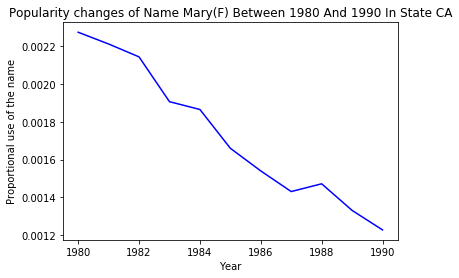

In [18]:
BN.NamePopularityPlot(name='Mary', yearRange=(1980,1990), state='CA', sex = 'F')

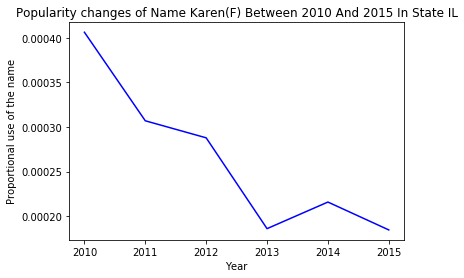

In [19]:
BN.NamePopularityPlot(name='Karen', yearRange=(2010,2015), state='IL', sex = 'F')

### Test NameFlip(n=10)
### List top n names that filliped over the years. (i.e. from boy name to girl or the reverse). Provide a plot of the names showing the year.

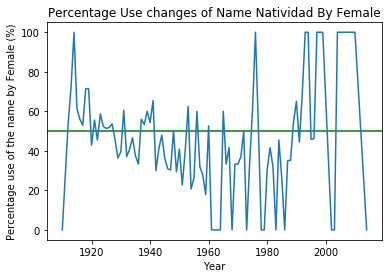

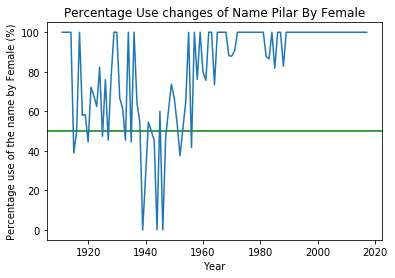

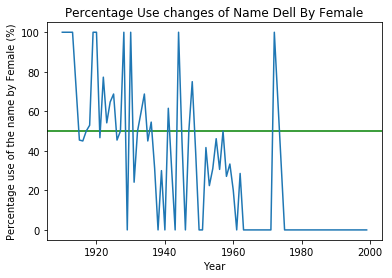

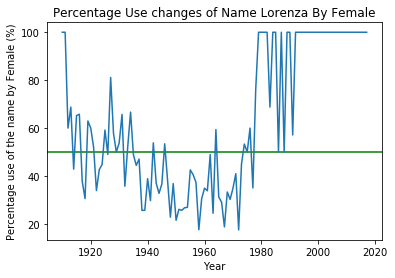

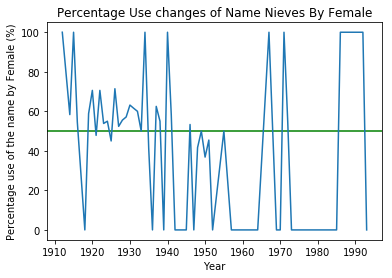

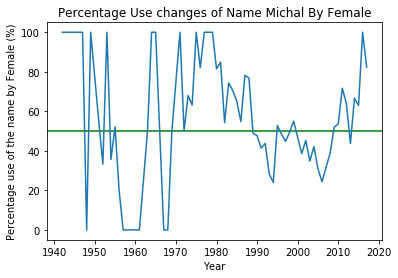

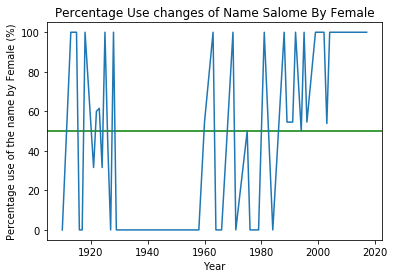

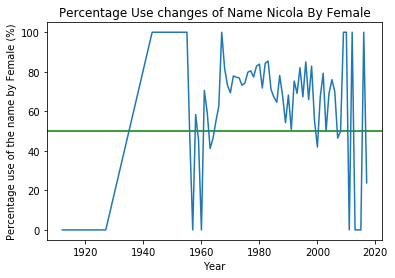

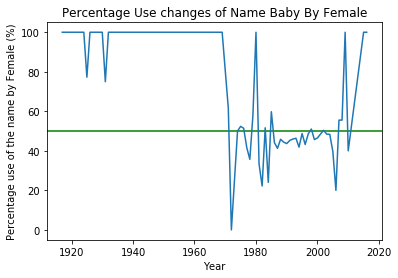

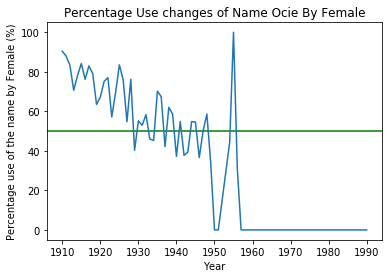

,Name,# Flip
0,Natividad,28
1,Pilar,22
2,Dell,21
3,Lorenza,20
4,Nieves,19
5,Michal,18
6,Salome,17
7,Nicola,16
8,Baby,16
9,Ocie,15


In [20]:
# This example used the NameFlip method in BabyNames class which will found the top ten names that flipped the most
# in the complete dataset 
# Because the huge size of number of names in our complete dataset and because of the complexity of detecting flips
# year by year, this function will take about 10 minutes to run.
BN.NameFlip(10)

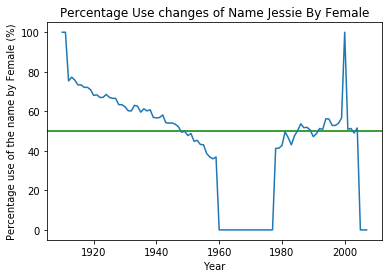

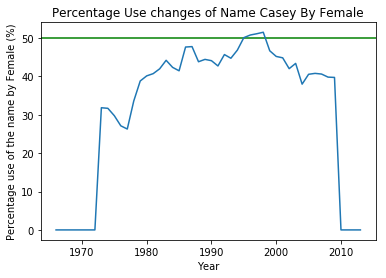

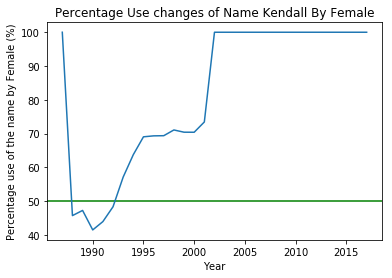

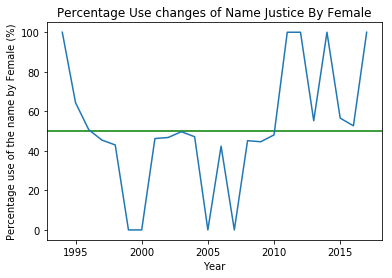

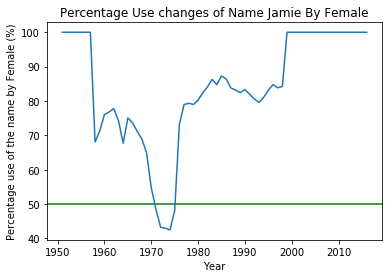

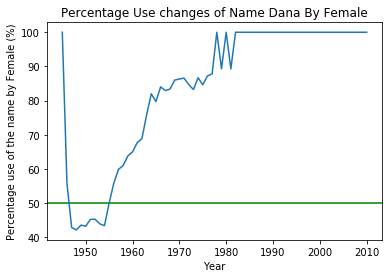

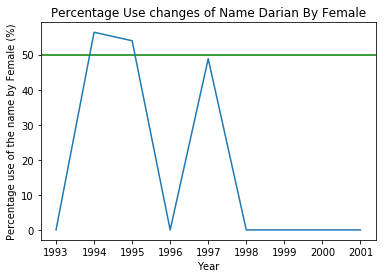

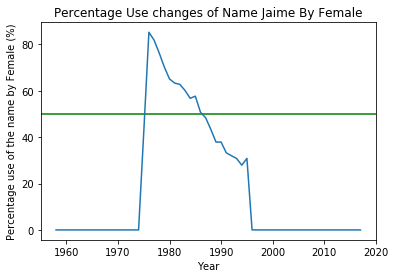

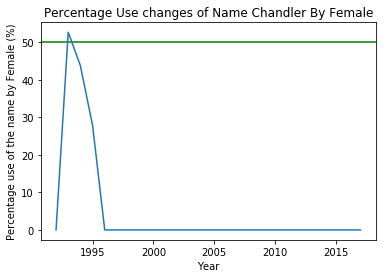

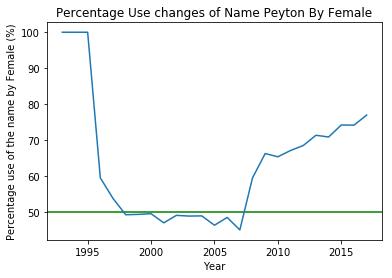

,Name,# Flip
0,Jessie,7
1,Casey,2
2,Kendall,2
3,Justice,2
4,Jamie,2
5,Dana,2
6,Darian,2
7,Jaime,2
8,Chandler,2
9,Peyton,2


In [21]:
# This exmaple used the NameFlip2 method in BabyNames class which will only count flips in names that were used more 
# than 500 times from 1910 to 2017. Names that were barely used are dropped using this method, since we regard those 
# names as outliers which are very uncommon and are not of our interested.
# Since the dataset is smaller after dropping those uncommon names, this function will only take several seconds to run.
BN.NameFlip2(10)

### Tell a story that was not told in the class (of course from Baby Names dataset). Support your story with plots.

### Analysis 1. Name Length by Gender over Time


In [22]:
#Create a new dataframe to manipulate
dfNew = BN.df

#Calculate a new column called name length, which is th length of the number of characters in a name 
dfNew['name_length']  = dfNew['Name'].str.len()
dfNew.head(5)

,State,Gender,YOB,Name,Number,name_length
0,IN,F,1910,Mary,619,4
1,IN,F,1910,Helen,324,5
2,IN,F,1910,Ruth,238,4
3,IN,F,1910,Dorothy,215,7
4,IN,F,1910,Mildred,200,7


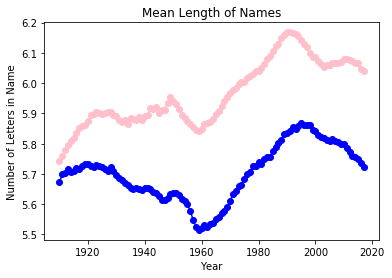

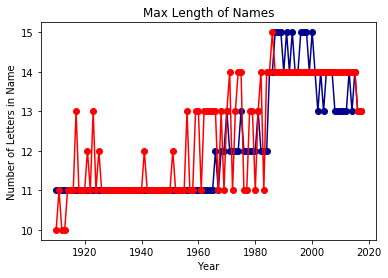

In [23]:
#Create dataframes for the MEAN name length of females and males grouped by Year of birth 
nameLengthF = dfNew.loc[dfNew['Gender'] == 'F'].groupby('YOB').agg({'name_length': 'mean'})
nameLengthM = dfNew.loc[dfNew['Gender'] == 'M'].groupby('YOB').agg({'name_length': 'mean'})

#Create dataframes for the MAX name length of females and males grouped by Year of birth 
nameLengthFmax = dfNew.loc[dfNew['Gender'] == 'F'].groupby('YOB').agg({'name_length': 'max'})
nameLengthMmax = dfNew.loc[dfNew['Gender'] == 'M'].groupby('YOB').agg({'name_length': 'max'})

year_list = [i for i in range(1910,2018)]

#plot for mean
plt.plot(year_list, nameLengthM, 'blue', marker = 'o')
plt.plot(year_list, nameLengthF, 'pink', marker = 'o')
plt.title('Mean Length of Names')
plt.xlabel('Year')
plt.ylabel('Number of Letters in Name')
plt.show()

#plot for max
plt.plot(year_list, nameLengthMmax, 'darkblue', marker = 'o')
plt.plot(year_list, nameLengthFmax, 'red', marker = 'o')
plt.title('Max Length of Names')
plt.xlabel('Year')
plt.ylabel('Number of Letters in Name')
plt.show()

In [24]:
#See number of unique names for each gender
dfNew['Name'].groupby(dfNew['Gender']).describe()

,count,unique,top,freq
Gender,,,,
F,3308901,20669,Elizabeth,5485
M,2624660,13656,John,5508


### TAKEAWAY 1 :
    # Name Variability: We see girls have many more unique versions of names than boys 
    # Name Length: Girls also have slightly longer names, but only by a letter or so
        # ~1960 we see both girl names and boy names began to get longer, but just before 2000's dipped again
        # Looking at max name length, we see the number of letters in names have risen from ~10 to ~15 letters
            # It is intersting that the Max name is getting longer, and we might form hypothesis relating to the 
            # millennials generation's desire to be unique and different by having more elaborate names 
            # This might be even more emphasized for females

### Analysis 2. Birth Rate over Time by Gender 

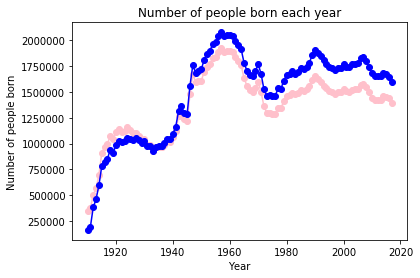

In [25]:
#Create two dataframes for male and females, each with the count of names 
#This would represent the births for each gender in the given year 
namesF = dfNew.loc[dfNew['Gender'] == 'F'].groupby('YOB').agg({'Number': 'sum'})
namesM = dfNew.loc[dfNew['Gender'] == 'M'].groupby('YOB').agg({'Number': 'sum'})

#Plot the birth rates
year_list = [i for i in range(1910,2018)]
plt.plot(year_list, namesF, 'pink', marker = 'o')
plt.plot(year_list, namesM, 'blue', marker = 'o')
plt.title('Number of people born each year')
plt.xlabel('Year')
plt.ylabel('Number of people born')
plt.show()

### TAKEAWAY 2:
    # Population Increase: upwards trend in birth rate, especially after 1940, peeking at 1960.
    # Birth Gender: It seems to be about even but we do see that males are slightly higher.
    # This is interesting because we would expect 50/50 chance... 
        # currently the world popoulation is 102 males to 100 females...
            # It is reported that there is a higher female birth death rate, 
              thus this could be the cause for discrepancy

### Analysis 3. UNISEX Name investigation 

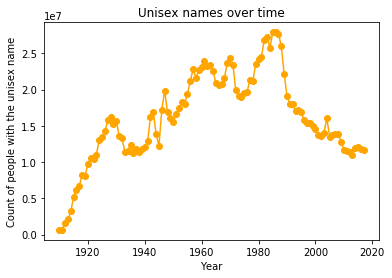

In [26]:
#Create a dataframe of just male names and just female names

set1 = dfNew.loc[dfNew['Gender'] == 'F']
set2 = dfNew.loc[dfNew['Gender'] == 'M']
set1
  
# Union of two sets to get the intersection (names that both girls and boys had  i.e. UNISEX)
s1 = pd.merge(set1, set2, how='inner', on=['Name','YOB'])


# Create calculated field summing the counts of each name for both genders to get a total for each year
s1['TotalCount'] = s1['Number_x'] + s1['Number_y']

# Return selected columns 
s1[['Name','TotalCount', 'Gender_x', 'Number_x', 'Gender_y','Number_y', 'YOB', 'State_y']]

#Group by year for plotting 
unisex = s1.groupby('YOB').agg({'TotalCount': 'sum'})

#Plot aggregated count of unisex names over time 
year_list = [i for i in range(1910,2018)]
plt.plot(year_list, unisex, 'orange', marker = 'o')
plt.title('Unisex names over time')
plt.xlabel('Year')
plt.ylabel('Count of people with the unisex name')
plt.show()

### TAKEAWAY 3:
    # Unisex Names generally increased for a time period from 1910 to 1990 and then started to decrease since 1985
    # This might once again support our millennials generation's desire to be unique, even across genders
    # The unisex name decrease is also somewhat surprising on the other hand, as now gender becomes fluid
        # on a continous spectrum and there is emphasis on not slotting children to gender norms... however
        # this movement does not seem to align to the decline of unisex names 

### Analysis 4: Unisex Names by State & Party Affiliation (Democratic/Republican)

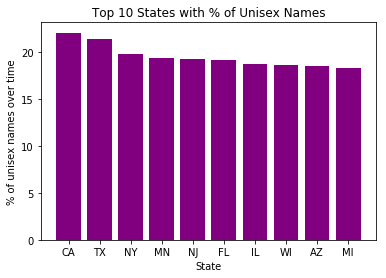

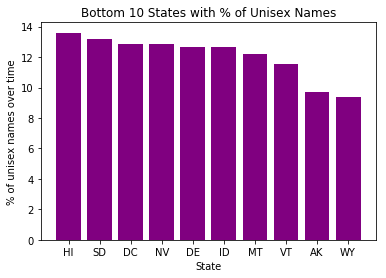

In [27]:
#Create 1 dataframe that has only the unisex names by state
setA = s1.groupby('State_y').agg('sum')[['TotalCount']]
#Create another dataframe that has the total count of births per state
setB = dfNew.groupby('State').agg('sum')[['Number']]

#Reset index so can use column to join
setB = setB.reset_index()

#Reset index and rename column so join is easy 
setA = setA.reset_index().rename(columns={'State_y': 'State'})

#join tables so total count of unisex name for each state & total count of births in each state are in the same table
unisexResult =  pd.merge(setA, setB, how='inner', left_on='State', right_on='State')
unisexResult['unisexPercent'] = unisexResult['Number']/ unisexResult['TotalCount'] * 100
unisexResult.head(10)


#Plot aggregated count of unisex names over time 
A= unisexResult
B = unisexResult

A=A.sort_values(by=['unisexPercent'], ascending = False).head(10)
top10state = A['State'].tolist()
top10percent = A['unisexPercent'].tolist()

#Plot top 10 States with percentage use of unisex names
fig, ax = plt.subplots()
ax.bar([*range(10)], top10percent, color = 'purple')
ax.set_xticks([*range(10)])
ax.set_xticklabels(top10state)
plt.title('Top 10 States with % of Unisex Names')
plt.xlabel('State')
plt.ylabel('% of unisex names over time')
plt.show()

#Bottom 10 States with percentage use of unisex names
B = B.sort_values(by=['unisexPercent'], ascending = False).tail(10)
bottom10state = B['State'].tolist()
bottom10percent = B['unisexPercent'].tolist()

fig, ax = plt.subplots()
ax.bar([*range(10)], bottom10percent, color = 'purple')
ax.set_xticks([*range(10)])
ax.set_xticklabels(bottom10state)
plt.title('Bottom 10 States with % of Unisex Names')
plt.xlabel('State')
plt.ylabel('% of unisex names over time')
plt.show()

### TAKEAWAY 4

See reference: https://www.google.com/search?safe=off&biw=1288&bih=696&tbm=isch&sa=1&ei=wGvjW-TkAZOJjwSJpZCQCA&q=current+state+by+state+party+affliication&oq=current+state+by+state+party+affliication&gs_l=img.3...15412.19872..19957...3.0..0.77.2035.35......1....1..gws-wiz-img.......0j0i24j35i39j0i8i30j0i67.yb0eTFOkWfc#imgrc=i3dbo3i1i8cipM:

#### Bottom 10 States with Unisex Names : 
    # Democratic -  DC, NV, DE
    # Republican - SD, ID, AK, WY
    # Competitive - HI,VT, MT
    
#### Top 10 States with Unisex Names
    # Democratic - CA, NJ, FL
    # Republican -  WI, AZ
    # Competitive - NY, IL, TX, MN, MI
    
#As we can see, states have a higher prevelance of unisex names seem to be have more democratic or competitive (meaning the state can sway either way) party affiliation. 
    
#This is consistent to our hypothesis that more liberal states aka democratic and swing states would be more      accepting and all so they would probably have more unisex names vs Republicans who would want black and white gender roles
    
#In the bottom 10 states we see that there are 4/10 republican states
    
#In the top 10 states we see that there are 2/10 republican states


## Problem 2: Pandas
### Using MySQL and the sample database “WORLD”, your tasks are:
1. Translate the following SQL commands into Pandas library commands.
2. Make sure to compare results
3. Provide a description of what each SQL statement intends to do.

In [28]:
#Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymysql

### Please enter the username and password if rerunning the queries

In [29]:
#Set up connection to local DB 

cnx = pymysql.connect(user='root', \
      password='MYSQLmsia422', \
      host= 'localhost', \
      port=3306, \
      db='world', \
      autocommit=True)

In [30]:
#Create 3 initial dataframes and load data from database

df_country = pd.read_sql_query('select * from Country', con=cnx,index_col='Code')
df_city = pd.read_sql_query('select * from city', con=cnx,index_col='ID')
df_countrylanguage = pd.read_sql_query('select * from countrylanguage', con=cnx,index_col=['CountryCode','Language'])

### EXERCISE 1:

##### This query returns the Top 10 countries that have a population > 50000000 and orders them in descending order

select *
from country
where population > 50000000
order by population DESC limit 10

In [31]:
#MySQL output for query 1 used to validate results 

sql_1 = pd.read_sql_query('select * from country where population > 50000000 order by population DESC limit 10', 
                       con=cnx,index_col='Code')
sql_1

,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
Code,,,,,,,,,,,,,,
CHN,China,Asia,Eastern Asia,9572900.0,-1523,1277558000,71.4,982268.0,917719.0,Zhongquo,People'sRepublic,Jiang Zemin,1891,CN
IND,India,Asia,Southern and Central Asia,3287263.0,1947,1013662000,62.5,447114.0,430572.0,Bharat/India,Federal Republic,Kocheril Raman Narayanan,1109,IN
USA,United States,North America,North America,9363520.0,1776,278357000,77.1,8510700.0,8110900.0,United States,Federal Republic,George W. Bush,3813,US
IDN,Indonesia,Asia,Southeast Asia,1904569.0,1945,212107000,68.0,84982.0,215002.0,Indonesia,Republic,Abdurrahman Wahid,939,ID
BRA,Brazil,South America,South America,8547403.0,1822,170115000,62.9,776739.0,804108.0,Brasil,Federal Republic,Fernando Henrique Cardoso,211,BR
PAK,Pakistan,Asia,Southern and Central Asia,796095.0,1947,156483000,61.1,61289.0,58549.0,Pakistan,Republic,Mohammad Rafiq Tarar,2831,PK
RUS,Russian Federation,Europe,Eastern Europe,17075400.0,1991,146934000,67.2,276608.0,442989.0,Rossija,Federal Republic,Vladimir Putin,3580,RU
BGD,Bangladesh,Asia,Southern and Central Asia,143998.0,1971,129155000,60.2,32852.0,31966.0,Bangladesh,Republic,Shahabuddin Ahmad,150,BD
JPN,Japan,Asia,Eastern Asia,377829.0,-660,126714000,80.7,3787042.0,4192638.0,Nihon/Nippon,Constitutional Monarchy,Akihito,1532,JP


In [32]:
#MySQL query via pandas dataframe for query #1
#First it looks within the country dataframe for rows with population value > 50000000
#Next we sort the values based on population in descending order and take the top 10
#Resulting in the top 10 countries based on greatest population 

pandas_1 = df_country[df_country['Population'] > 50000000].sort_values(by = 'Population', ascending = False).iloc[:10,:]
pandas_1

,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
Code,,,,,,,,,,,,,,
CHN,China,Asia,Eastern Asia,9572900.0,-1523.0,1277558000,71.4,982268.0,917719.0,Zhongquo,People'sRepublic,Jiang Zemin,1891.0,CN
IND,India,Asia,Southern and Central Asia,3287263.0,1947.0,1013662000,62.5,447114.0,430572.0,Bharat/India,Federal Republic,Kocheril Raman Narayanan,1109.0,IN
USA,United States,North America,North America,9363520.0,1776.0,278357000,77.1,8510700.0,8110900.0,United States,Federal Republic,George W. Bush,3813.0,US
IDN,Indonesia,Asia,Southeast Asia,1904569.0,1945.0,212107000,68.0,84982.0,215002.0,Indonesia,Republic,Abdurrahman Wahid,939.0,ID
BRA,Brazil,South America,South America,8547403.0,1822.0,170115000,62.9,776739.0,804108.0,Brasil,Federal Republic,Fernando Henrique Cardoso,211.0,BR
PAK,Pakistan,Asia,Southern and Central Asia,796095.0,1947.0,156483000,61.1,61289.0,58549.0,Pakistan,Republic,Mohammad Rafiq Tarar,2831.0,PK
RUS,Russian Federation,Europe,Eastern Europe,17075400.0,1991.0,146934000,67.2,276608.0,442989.0,Rossija,Federal Republic,Vladimir Putin,3580.0,RU
BGD,Bangladesh,Asia,Southern and Central Asia,143998.0,1971.0,129155000,60.2,32852.0,31966.0,Bangladesh,Republic,Shahabuddin Ahmad,150.0,BD
JPN,Japan,Asia,Eastern Asia,377829.0,-660.0,126714000,80.7,3787042.0,4192638.0,Nihon/Nippon,Constitutional Monarchy,Akihito,1532.0,JP


In [33]:
# Test that the SQL output matches the pandas output.
# True = Success in matching!

all(sql_1 == pandas_1)

True

### EXERCISE 2

##### This query is counting the total number of countries and total population in each continent, sort the output by Continent

select Continent, count(*) As Number_Countries, sum(population) As Population
from country
where population > 0
group by Continent
order by 1 ASC

In [34]:
#MySQL output for query 2 used to validate results 
sql_2 = pd.read_sql_query('select Continent, count(*) As Number_Countries, sum(population) As Population from country \
                          where population > 0 group by Continent order by 1 ASC', con=cnx)
sql_2

,Continent,Number_Countries,Population
0,Asia,51,3.705026e+09
1,Europe,46,7.300746e+08
2,North America,37,4.829930e+08
3,Africa,57,7.844750e+08
4,Oceania,27,3.040115e+07
5,South America,14,3.457800e+08


In [35]:
#MySQL query via pandas dataframe for query #2

#First it looks within the country dataframe for rows with population value > 0
#Next we group the rows by Continent counting the number of countries within each continent
#We also renamed columns to simplify combining the data
count_country = df_country[df_country['Population'] > 0].groupby(['Continent']).agg('count')[['Name']].rename(
    index=str, columns={"Continent": "Continent", "Name": "Number_Countries"})


#Take the same dataframe, also filtered by population > 0
#But grouped by the Continent and summing the population
sum_pop = df_country[df_country['Population'] > 0].groupby(['Continent']).agg(sum)[['Population']]

#Combine two calculated fields into the same dataframe 
pandas_2 = count_country.join(sum_pop)

#Reset index so columns appear nicely
pandas_2 = pandas_2.reset_index()
pandas_2

,Continent,Number_Countries,Population
0,Africa,57,784475000
1,Asia,51,3705025700
2,Europe,46,730074600
3,North America,37,482993000
4,Oceania,27,30401150
5,South America,14,345780000


In [36]:
# Test that the SQL output matches the pandas output.
# True = Success in matching!

#all(sql_2 == pandas_2)
#this question cannot be matched due to the Continent datatype discrepancy

### Exercise 3 

##### This query is selecting Top 10 cities that have the largest city population from the USA and returns them by ordering city population in descending order

select city.Name As City, city.population
from city
inner join country ON city.CountryCode = country.code
where country.code = 'USA'
order by city.population DESC limit 10

In [37]:
#MySQL output for query 3 used to validate results 

sql_3 = pd.read_sql_query('select city.Name As City, city.population \
                          from city inner join country ON city.CountryCode = country.Code\
                          where country.Code = "USA" \
                          order by city.population DESC limit 10',
                          con=cnx)
sql_3

,City,population
0,New York,8008278
1,Los Angeles,3694820
2,Chicago,2896016
3,Houston,1953631
4,Philadelphia,1517550
5,Phoenix,1321045
6,San Diego,1223400
7,Dallas,1188580
8,San Antonio,1144646
9,Detroit,951270


In [38]:
#Take an inner ojin between country and city data frames so all the data is in a single table
#Filter the data to country = USA so that we only get cities in the US
#Sort by Population in descending order because we want top 10 based on population 

#In this problem we noticed that the join was not necessary, as the data is in the same table.. 
#but did so anyway to match the SQL query)sql_3
 
country = df_country.reset_index()
joinCountryCity = pd.merge(country, df_city, how = 'inner', left_on = 'Code', right_on = 'CountryCode')
city_pop = joinCountryCity[joinCountryCity['Code'] == 'USA'].sort_values(by = 'Population_y', 
                                                   ascending = False)[['Name_y', 'Population_y']].rename(
                                            index = str, columns = {'Name_y': 'City', 'Population_y': 'population'})
#Select the top 10 cities based on population 
pandas_3 = city_pop.iloc[:10,:].reset_index().drop(['index'], axis = 1)
pandas_3

,City,population
0,New York,8008278
1,Los Angeles,3694820
2,Chicago,2896016
3,Houston,1953631
4,Philadelphia,1517550
5,Phoenix,1321045
6,San Diego,1223400
7,Dallas,1188580
8,San Antonio,1144646
9,Detroit,951270


In [39]:
# Test that the SQL output matches the pandas output.
# True = Success in matching!

all(sql_3 == pandas_3)

True

### EXERCISE 4

##### This query is returning Top 10 countries and their official langauge, ordered by the amount of national population who speak the official language 

select country.Name, Language, (Percentage * population) / 100
from countrylanguage
inner join country on countrylanguage.CountryCode = country.code
where IsOfficial = True
order by 3 DESC limit 10

In [40]:
#MySQL output for query 4 used to validate results 

sql_4 = pd.read_sql_query('select country.Name, Language, (Percentage * population) / 100 \
                           from countrylanguage \
                           inner join country on countrylanguage.CountryCode = country.code \
                           where IsOfficial = True \
                           order by 3 DESC limit 10',
                           con=cnx)
sql_4

,Name,Language,(Percentage * population) / 100
0,China,Chinese,1.175353e+09
1,India,Hindi,4.044512e+08
2,United States,English,2.399437e+08
3,Brazil,Portuguese,1.658621e+08
4,Russian Federation,Russian,1.272448e+08
5,Bangladesh,Bengali,1.261844e+08
6,Japan,Japanese,1.255736e+08
7,Mexico,Spanish,9.106940e+07
8,Germany,German,7.501637e+07
9,Vietnam,Vietnamese,6.929418e+07


In [41]:
#Reset indexes so the data looks nice in column format

country = df_country.reset_index()
countrylanguage = df_countrylanguage.reset_index()

#Inner Join country language dataframe with country data frame 
joinCountryLan = pd.merge(country, countrylanguage, how = 'inner', left_on = 'Code', right_on = 'CountryCode')

#Created calculated column for the # of people who speak the language 
joinCountryLan['(Percentage * population) / 100'] = joinCountryLan['Percentage']*joinCountryLan['Population']/100

#Sort the values in descending order so that we can take the top 10
ordered_join = joinCountryLan[joinCountryLan['IsOfficial'] == 'T'].sort_values(by = '(Percentage * population) / 100', 
                                                            ascending = False).iloc[:10,:]
pandas_4 = ordered_join[['Name', 'Language', '(Percentage * population) / 100']].reset_index().drop(['index'], axis = 1)
pandas_4

,Name,Language,(Percentage * population) / 100
0,China,Chinese,1.175353e+09
1,India,Hindi,4.044511e+08
2,United States,English,2.399437e+08
3,Brazil,Portuguese,1.658621e+08
4,Russian Federation,Russian,1.272448e+08
5,Bangladesh,Bengali,1.261844e+08
6,Japan,Japanese,1.255736e+08
7,Mexico,Spanish,9.106940e+07
8,Germany,German,7.501637e+07
9,Vietnam,Vietnamese,6.929418e+07


In [42]:
# Test that the SQL output matches the pandas output.
# True = Success in matching!

all(sql_4 == pandas_4)

True

### EXERCISE 5

##### This query is returning Top 5 most spoken languages in the world and the total amount of world population who speak that language. The output is ordered by the total amount of world population who speak that language.

select Language, sum((Percentage * population) / 100)
from countrylanguage
inner join country ON countrylanguage.CountryCode = country.code
group by Language
order by 2 desc limit 5

In [43]:
sql_5 = pd.read_sql_query('select Language, sum((Percentage * population) / 100) \
                          from countrylanguage \
                          inner join country ON countrylanguage.CountryCode = country.code \
                          group by Language \
                          order by 2 desc limit 5',
                          con=cnx)
sql_5

,Language,sum((Percentage * population) / 100)
0,Chinese,1.191844e+09
1,Hindi,4.056331e+08
2,Spanish,3.550295e+08
3,English,3.470779e+08
4,Arabic,2.338392e+08


In [44]:
#Group our joined country/country language data by Language
#sum over the calculated field we created eariler to get the number of people who speak that language 
#Sort by the number of people who speak the langugage in descending order so that we can select the top 5
pandas_5 = joinCountryLan.groupby(['Language']).agg(sum)[['(Percentage * population) / 100']].sort_values(
                            by = '(Percentage * population) / 100', ascending = False
                            ).iloc[:5, :].reset_index().rename(index = str, columns = {
                            'Language': 'Language', '(Percentage * population) / 100': 'sum((Percentage * population) / 100)'})
pandas_5

,Language,sum((Percentage * population) / 100)
0,Chinese,1.191844e+09
1,Hindi,4.056331e+08
2,Spanish,3.550295e+08
3,English,3.470779e+08
4,Arabic,2.338392e+08


In [45]:
# Test that the SQL output matches the pandas output.
# True = Success in matching!

all(sql_4 == pandas_4)

True